In [14]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

ImportError: cannot import name 'axes' from 'matplotlib' (c:\Users\eriko\OneDrive - NTNU\ntnu\fag\prosjekt\TCN\.venv\lib\site-packages\matplotlib\__init__.py)

In [16]:
X = np.load("electricity/data/electricity.npy")
X.shape

(370, 26136)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.95185171, 0.03334781])

In [14]:
df = pd.DataFrame(X.T)
dates_index = pd.date_range(start="2012/01/01", periods=X.shape[1], freq="H")
df.index = dates_index
df = df.loc["2012-01-01" : "2014-12-16"]
#df = df.reset_index(drop=True)
df.tail()

0        1       2        3       4       5       6    \
2014-12-16 19:00:00  11.421  101.710  6.9505  1026.40  420.73  1702.4  26.003   
2014-12-16 20:00:00  10.152  105.970  6.9505   867.89  435.37  1494.0  26.569   
2014-12-16 21:00:00  11.421   96.728  6.9505   760.16  410.98  1345.2  26.003   
2014-12-16 22:00:00  11.421   88.193  6.9505   709.35  400.00  1238.1  25.438   
2014-12-16 23:00:00  10.152   80.370  6.9505   644.31  341.46  1047.6  20.916   

                        7       8       9    ...      360       361      362  \
2014-12-16 19:00:00  1824.9  382.87  355.91  ...  1493.20  201700.0  14506.0   
2014-12-16 20:00:00  1676.8  402.10  369.89  ...  1498.20  196200.0  12865.0   
2014-12-16 21:00:00  1478.1  300.70  336.56  ...  1489.70  186500.0  12848.0   
2014-12-16 22:00:00  1249.2  256.99  250.54  ...  1201.30  150600.0  12755.0   
2014-12-16 23:00:00  1070.7  211.54  226.88  ...   860.81  123200.0   9641.4   

                         363     364     365     366      367     368      369  
2014-12-16 19:00:00  12205.0  475.88  29.842  2388.1   599.33  3396.6  74919.0  
2014-12-16 20:00:00  12114.0  483.70  27.501  1676.0   819.70  3093.1  75622.0  
2014-12-16 21:00:00  11909.0  491.53  35.108  2284.5   939.90  3090.9  76757.0  
2014-12-16 22:00:00  11455.0  451.11  42.715  3242.3  1051.80  2958.2  72000.0  
2014-12-16 23:00:00   7795.5  418.51  36.864  3084.3   958.26  2827.7  77838.0  

[5 rows x 370 columns]

In [15]:
len(df)

25944

In [ ]:

# Create the  date range

# Cut off at start and end date


dates = df.index


In [9]:
X = np.load("prototypes/prototypes_matrices/electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.npy")
d = pickle.load(open("prototypes/cluster_dicts/electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.pkl", "rb"))

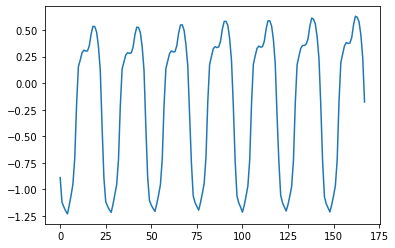

In [10]:
plt.plot(X[d[228], -24*7:])

In [10]:
import pandas as pd
df = pd.read_csv("df_table_clusters_revenue.csv")

In [11]:
names = df["name"].to_numpy()
representations = []
similarities = []
algorithm = []
num_clusters = []
for name in names:
    s = name.split("_")
    num_clusters.append(s[-1][:-4])
    representations.append(s[1])
    if s[-3] == "clustering":
        algorithm.append(s[-4])
        similarities.append(s[-5])
    else:
        algorithm.append(s[-3])
        similarities.append(s[-4])
df["representation"] = representations
df["similarities"] = similarities
df["algorithm"] = algorithm
df["num_clusters"] = num_clusters
df = df.drop(columns=["name"])
df.head()

LOSS   WAPE   MAPE  SMAPE    MAE    RMSE representation similarities  \
0  0.156  0.125  1.178  0.314   8873  147740       embedded    euclidean   
1  0.154  0.132  1.215  0.309   9371  160585       embedded    euclidean   
2  0.155  0.139  1.110  0.426   9858  165805       embedded    euclidean   
3  0.155  0.146  0.413  0.234  10298  179650       embedded    euclidean   
4  0.152  0.144  1.473  0.338  10200  169837       embedded    euclidean   

       algorithm num_clusters  
0  Agglomerative           20  
1         KMeans           20  
2       Spectral           20  
3  Agglomerative          100  
4  Agglomerative          250

In [16]:
df = df.replace({"pca": "PCA", "euclidean" : "ED", "embedded": "Embedded ID", "sarima":"SARIMA", "raw":"Raw", "dtw":"DTW", "correlation": "Corr"})
for i, row in df.iterrows():
    print(f"TCN & {row[6]}({row[9]}) & {row[7]} & {row[8]} ({row[9]}) & {row[1]:.3f} & {row[2]:.3f} & {row[3]:.3f} & {row[4]} & {row[5]} \\\\")

TCN & Embedded ID(20) & ED & Agglomerative (20) & 0.125 & 1.178 & 0.314 & 8873 & 147740 \\
TCN & Embedded ID(20) & ED & KMeans (20) & 0.132 & 1.215 & 0.309 & 9371 & 160585 \\
TCN & Embedded ID(20) & ED & Spectral (20) & 0.139 & 1.110 & 0.426 & 9858 & 165805 \\
TCN & Embedded ID(100) & ED & Agglomerative (100) & 0.146 & 0.413 & 0.234 & 10298 & 179650 \\
TCN & Embedded ID(250) & ED & Agglomerative (250) & 0.144 & 1.473 & 0.338 & 10200 & 169837 \\
TCN & Embedded ID(50) & ED & Agglomerative (50) & 0.141 & 0.545 & 0.298 & 9960 & 169016 \\
TCN & Embedded ID(100) & ED & KMeans (100) & 0.162 & 0.630 & 0.499 & 11452 & 187928 \\
TCN & Embedded ID(250) & ED & KMeans (250) & 0.161 & 0.401 & 0.398 & 11400 & 186676 \\
TCN & Embedded ID(50) & ED & KMeans (50) & 0.137 & 0.850 & 0.324 & 9728 & 167862 \\
TCN & Embedded ID(10) & ED & Agglomerative (10) & 0.127 & 1.034 & 0.312 & 8971 & 151733 \\
TCN & Embedded ID(10) & ED & KMeans (10) & 0.133 & 0.449 & 0.344 & 9419 & 155561 \\
TCN & Embedded ID(10) & ED 

In [64]:
import pandas as pd
df = pd.read_csv("df_table_clusters_revenue.csv")

In [65]:
names = df["name"].to_numpy()
representations = []
similarities = []
algorithm = []
num_clusters = []
for name in names:
    s = name.split("_")
    num_clusters.append(s[-1][:-4])
    representations.append(s[1])
    if s[-3] == "clustering":
        algorithm.append(s[-4])
        similarities.append(s[-5])
    else:
        algorithm.append(s[-3])
        similarities.append(s[-4])
df["representation"] = representations
df["similarities"] = similarities
df["algorithm"] = algorithm
df["num_clusters"] = num_clusters
df["repsim"] = df["representation"] + df["similarities"]
df = df.drop(columns=["name", "LOSS"])
df.head()

WAPE   MAPE  SMAPE    MAE    RMSE representation similarities  \
0  0.125  1.178  0.314   8873  147740       embedded    euclidean   
1  0.132  1.215  0.309   9371  160585       embedded    euclidean   
2  0.139  1.110  0.426   9858  165805       embedded    euclidean   
3  0.146  0.413  0.234  10298  179650       embedded    euclidean   
4  0.144  1.473  0.338  10200  169837       embedded    euclidean   

       algorithm num_clusters             repsim  
0  Agglomerative           20  embeddedeuclidean  
1         KMeans           20  embeddedeuclidean  
2       Spectral           20  embeddedeuclidean  
3  Agglomerative          100  embeddedeuclidean  
4  Agglomerative          250  embeddedeuclidean

In [57]:
df = df.replace({"pca": "PCA", "euclidean" : "ED", "embedded": "Embedded ID", "sarima":"SARIMA", "raw":"Raw", "dtw":"DTW", "correlation": "Corr"})

In [58]:
for i, row in df.iterrows():
    print(f"TCN & {row[5]}({row[8]}) & {row[6]} & {row[7]} ({row[8]}) & {row[0]:.3f} & {row[1]:.3f} & {row[2]:.3f} & {row[3]} & {row[4]} \\\\")

TCN & Embedded ID(20) & ED & Agglomerative (20) & 0.125 & 1.178 & 0.314 & 8873 & 147740 \\
TCN & Embedded ID(20) & ED & KMeans (20) & 0.132 & 1.215 & 0.309 & 9371 & 160585 \\
TCN & Embedded ID(20) & ED & Spectral (20) & 0.139 & 1.110 & 0.426 & 9858 & 165805 \\
TCN & Embedded ID(100) & ED & Agglomerative (100) & 0.146 & 0.413 & 0.234 & 10298 & 179650 \\
TCN & Embedded ID(250) & ED & Agglomerative (250) & 0.144 & 1.473 & 0.338 & 10200 & 169837 \\
TCN & Embedded ID(50) & ED & Agglomerative (50) & 0.141 & 0.545 & 0.298 & 9960 & 169016 \\
TCN & Embedded ID(100) & ED & KMeans (100) & 0.162 & 0.630 & 0.499 & 11452 & 187928 \\
TCN & Embedded ID(250) & ED & KMeans (250) & 0.161 & 0.401 & 0.398 & 11400 & 186676 \\
TCN & Embedded ID(50) & ED & KMeans (50) & 0.137 & 0.850 & 0.324 & 9728 & 167862 \\
TCN & Embedded ID(10) & ED & Agglomerative (10) & 0.127 & 1.034 & 0.312 & 8971 & 151733 \\
TCN & Embedded ID(10) & ED & KMeans (10) & 0.133 & 0.449 & 0.344 & 9419 & 155561 \\
TCN & Embedded ID(10) & ED 

In [59]:
names = df["name"].to_numpy()
representations = []
similarities = []
algorithm = []
num_clusters = []
for name in names:
    s = name.split("_")
    num_clusters.append(s[-1][:-4])
    representations.append(s[1])
    if s[-3] == "clustering":
        algorithm.append(s[-4])
        similarities.append(s[-5])
    else:
        algorithm.append(s[-3])
        similarities.append(s[-4])
df["representation"] = representations
df["similarities"] = similarities
df["repsim"] = df["representation"] + df["similarities"]
df["algorithm"] = algorithm
df["num_clusters"] = num_clusters
df = df.drop(columns=["name", "representation", "similarities"])
df.head()

KeyError: 'name'

In [60]:
df_corr = df[["WAPE", "MAPE", "SMAPE", "MAE", "RMSE"]]
df_corr.corr()

WAPE      MAPE     SMAPE       MAE      RMSE
WAPE   1.000000  0.055088  0.474308  0.999690  0.958373
MAPE   0.055088  1.000000  0.318784  0.056136  0.014579
SMAPE  0.474308  0.318784  1.000000  0.477674  0.364184
MAE    0.999690  0.056136  0.477674  1.000000  0.957465
RMSE   0.958373  0.014579  0.364184  0.957465  1.000000

In [30]:
from sklearn.linear_model import LinearRegression

In [66]:
y = df["WAPE"].values

In [67]:
dummies = pd.get_dummies(df[["repsim", "algorithm", "num_clusters"]])
dummies_cols = dummies.columns
X = dummies.values

In [68]:
df_save = pd.concat([df["WAPE"], dummies], axis=1)
df_save.head()
df_save.to_csv("to_r_revenue.csv")

In [56]:
lr = LinearRegression().fit(X,y)
lr.coef_

array([ 6.26666667e-04, -8.90000000e-04, -2.23333333e-04,  3.76666667e-04,
        1.10000000e-04,  6.00000000e-04, -7.00000000e-04,  1.00000000e-04,
       -2.52564103e-04,  5.51282051e-05,  2.85897436e-04, -2.17948718e-05,
       -6.66666667e-05])

In [62]:
df_param = pd.DataFrame({"param": dummies_cols, "value":lr.coef_})
df_param.sort_values(by=["value"]), lr.intercept_

(                       param     value
 1        repsim_pcaeuclidean -0.000890
 6           algorithm_KMeans -0.000700
 8            num_clusters_10 -0.000253
 2      repsim_rawcorrelation -0.000223
 12           num_clusters_50 -0.000067
 11            num_clusters_5 -0.000022
 9            num_clusters_20  0.000055
 7         algorithm_Spectral  0.000100
 4     repsim_sarimaeuclidean  0.000110
 10           num_clusters_30  0.000286
 3              repsim_rawdtw  0.000377
 5    algorithm_Agglomerative  0.000600
 0   repsim_embeddedeuclidean  0.000627,
 0.06255666666666666)

In [64]:
y

array([0.064, 0.063, 0.062, 0.061, 0.064, 0.06 , 0.058, 0.064, 0.063,
       0.061, 0.059, 0.062, 0.064, 0.061, 0.063, 0.061, 0.062, 0.061,
       0.062, 0.064, 0.06 , 0.061, 0.066, 0.06 , 0.062, 0.063, 0.063,
       0.061, 0.063, 0.062, 0.061, 0.063, 0.06 , 0.065, 0.065, 0.063,
       0.065, 0.061, 0.062, 0.063, 0.063, 0.061, 0.064, 0.06 , 0.064,
       0.065, 0.065, 0.06 , 0.064, 0.062, 0.062, 0.065, 0.065, 0.062,
       0.061, 0.062, 0.062, 0.063, 0.065, 0.062, 0.062, 0.063, 0.062,
       0.062])

In [61]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.165
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.335
Time:                        14:29:11   Log-Likelihood:                 324.30
No. Observations:                  64   AIC:                            -626.6
Df Residuals:                      53   BIC:                            -602.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0361      0.000    250.808      0.000       0.036       0.036
x

# SARIMAX

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [4]:
X = np.load("electricity/data/electricity.npy")

In [7]:
mod = SARIMAX(endog=X[1,-100:], exog=X[1,-100:], order=(1,1,1), seasonal_order=(1,1,1,24), initialization="approximate_diffuse").fit()

In [11]:
mod.forecast(24, exog=X[1,-24:])

array([ 78.947,  71.835,  66.856,  65.434,  68.279,  68.279,  71.835,
        84.637, 105.26 , 113.8  , 120.2  , 112.38 , 113.8  , 108.11 ,
       108.11 , 106.69 , 114.51 , 112.38 , 111.66 , 103.84 ,  92.461,
        88.193,  88.193,  82.504])

# PCA plot

In [26]:
from sklearn.decomposition import PCA
X = np.load("electricity/data/electricity.npy")

In [29]:
pca = PCA(n_components=2).fit(X)

In [30]:
pca.components_

array([[ 0.0026154 ,  0.00242362,  0.00245863, ...,  0.00322469,
         0.0027532 ,  0.00207974],
       [-0.00069223, -0.0004362 , -0.00039682, ...,  0.00430974,
         0.00456829,  0.00497297]])

In [44]:
import matplotlib.pyplot as plt

ImportError: cannot import name 'axes' from 'matplotlib' (c:\Users\eriko\OneDrive - NTNU\ntnu\fag\prosjekt\TCN\.venv\lib\site-packages\matplotlib\__init__.py)

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rc
ts_style = {
    "axes.spines.left": True,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": True,
    "ytick.left": True,
}
rc("text", usetex=True)

ImportError: cannot import name 'axes' from 'matplotlib' (c:\Users\eriko\OneDrive - NTNU\ntnu\fag\prosjekt\TCN\.venv\lib\site-packages\matplotlib\__init__.py)

In [45]:
s = """
0.127	0.398	0.264	8971	159704
0.134	0.404	0.276	9455	161393
0.135	0.412	0.282	9544	174504
0.132	0.420	0.288	9359	167315
0.129	0.494	0.300	9121	163184
0.210	0.789	0.409	14429	258244
0.130	0.343	0.212	9219	167007
0.158	0.336	0.231	11192	197787
0.131	0.345	0.210	9278	164812
0.140	0.341	0.214	9916	173678
0.160	0.356	0.231	11289	191768
0.137	0.338	0.218	9724	179982
"""

In [58]:
a =s.replace("\n", " \\\\\n").replace("\t", " & ")

In [59]:
print(a)

\\
0.127 & 0.398 & 0.264 & 8971 & 159704 \\
0.134 & 0.404 & 0.276 & 9455 & 161393 \\
0.135 & 0.412 & 0.282 & 9544 & 174504 \\
0.132 & 0.420 & 0.288 & 9359 & 167315 \\
0.129 & 0.494 & 0.300 & 9121 & 163184 \\
0.210 & 0.789 & 0.409 & 14429 & 258244 \\
0.130 & 0.343 & 0.212 & 9219 & 167007 \\
0.158 & 0.336 & 0.231 & 11192 & 197787 \\
0.131 & 0.345 & 0.210 & 9278 & 164812 \\
0.140 & 0.341 & 0.214 & 9916 & 173678 \\
0.160 & 0.356 & 0.231 & 11289 & 191768 \\
0.137 & 0.338 & 0.218 & 9724 & 179982 \\



In [65]:
from sklearn.decomposition import PCA
X = np.load("electricity/data/electricity.npy")
pca = PCA(n_components=400).fit(X)

ValueError: n_components=400 must be between 0 and min(n_samples, n_features)=370 with svd_solver='full'

In [64]:
pca.components_.shape

(2, 26136)

# Correlation is nan

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0)
X = df.values.T[:,4:-8]
X.shape

(15229, 40)

In [23]:
from sklearn.metrics import pairwise_distances
X[15220].reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
pairwise_distances(X[15220].reshape(1,-1), X[15228].reshape(1,-1), metric="correlation")

array([[nan]])

In [27]:
X[np.where(np.isnan(X))] = 0

In [28]:
X[np.where(np.isnan(X))]

array([], dtype=float64)

In [12]:
df.values.T[15228]

array([nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan])

# Test revenue prototypes

In [1]:
import numpy as np
import pickle
P = np.load("Z:\TCN_clone\TCN\\prototypes\\prototypes_matrices\\revenue_raw_unscaled__nc_30_correlation_KMeans_nc_100.npy")
d = pickle.load(open("Z:\TCN_clone\TCN\prototypes\cluster_dicts\\revenue_raw_unscaled_nc_30_correlation_KMeans_nc_100.pkl", "rb"))

In [14]:
c_d = {i : 0 for i in range(100)}
for k, v in d.items():
    c_d[v] += 1
for k, v in c_d.items():
    print(f"{k} : {v}")

0 : 13225
1 : 1
2 : 1
3 : 1
4 : 1
5 : 1
6 : 1
7 : 1
8 : 9
9 : 1
10 : 1
11 : 1
12 : 1
13 : 1
14 : 1
15 : 1
16 : 39
17 : 1
18 : 2
19 : 1
20 : 1
21 : 1
22 : 1
23 : 1
24 : 1
25 : 1
26 : 8
27 : 8
28 : 1
29 : 1
30 : 1
31 : 36
32 : 1
33 : 1
34 : 1
35 : 1
36 : 1
37 : 6
38 : 1
39 : 1
40 : 1
41 : 19
42 : 102
43 : 1
44 : 2
45 : 1
46 : 1
47 : 1
48 : 1
49 : 1
50 : 1
51 : 4
52 : 1
53 : 3
54 : 1
55 : 10
56 : 19
57 : 1
58 : 2
59 : 1
60 : 1
61 : 1
62 : 1
63 : 1
64 : 1
65 : 1
66 : 327
67 : 1
68 : 1
69 : 59
70 : 43
71 : 2
72 : 1
73 : 1
74 : 1
75 : 1
76 : 1
77 : 1
78 : 5
79 : 125
80 : 1
81 : 1
82 : 1
83 : 14
84 : 3
85 : 8
86 : 1
87 : 2
88 : 1
89 : 1
90 : 1
91 : 1
92 : 1
93 : 1064
94 : 10
95 : 2
96 : 1
97 : 1
98 : 1
99 : 1


# Visualization

In [20]:
from sklearn.decomposition import PCA

OSError: [WinError 126] The specified module could not be found

In [18]:
X_pca = PCA(n_components=5).fit_transform(X)

NameError: name 'PCA' is not defined

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(X_pca)

## Prototypes

In [15]:
ids = [0, 16, 31, 41, 42, 55, 56, 66, 69, 70, 79, 83, 93, 94]

In [3]:
import matplotlib.pyplot as plt

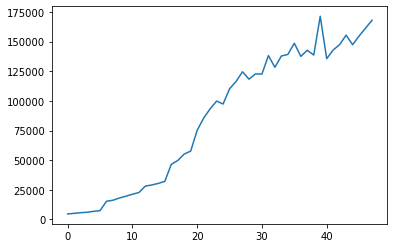

In [4]:
plt.plot(P[42])

In [5]:
import pandas as pd
from revenue.data import RevenueDataset
ds = RevenueDataset(
    file_path="revenue/data/processed_companies.csv",
    meta_path="revenue/data/comp_sect_meta.csv",
    data_scale=False,
    data_scaler="lol",
    start_date="2007-01-01",
    end_date="2019-01-01",
)
#df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0)
#X = df.values.T
X = ds.X.detach().squeeze(1).cpu().numpy()
X.shape

Dimension of X :  torch.Size([15229, 1, 48])
Dimension of Y :  torch.Size([15229, 1, 48])


(15229, 48)

In [6]:
for row in range(X.shape[0]):
    if len(X[row]) != 48:
        print(row)

In [7]:
from matplotlib import cm
cmap=cm.get_cmap("tab10")
cmap(1.1)

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
#rc("text", usetex=True)
ts_style = {
    "axes.spines.left": True,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": True,
    "ytick.left": True,
}

In [9]:
import pandas as pd
#length=120
date_range = pd.date_range(start="2007-01-01", periods=P.shape[1], freq="Q")
#len_series = min([len(p) for p in prototypes.values()])
size=4.77*2
height = 2
scale_plot = False
fill_area = True

In [10]:
X[np.where(np.isnan(X))] = 0

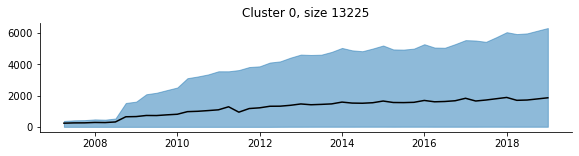

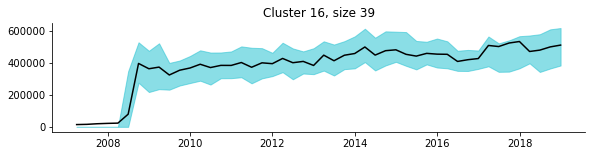

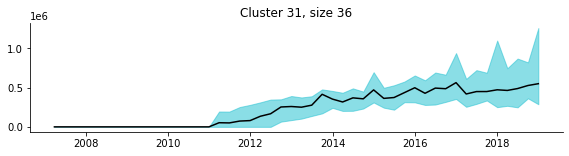

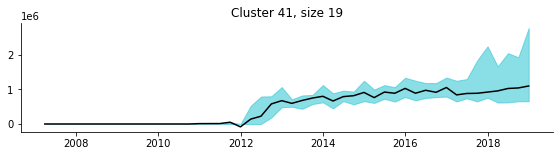

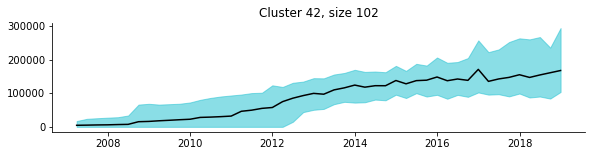

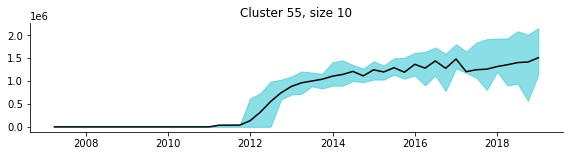

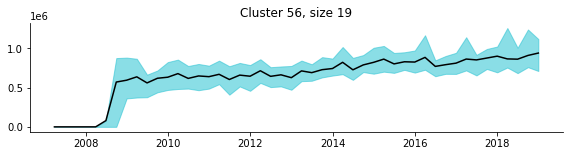

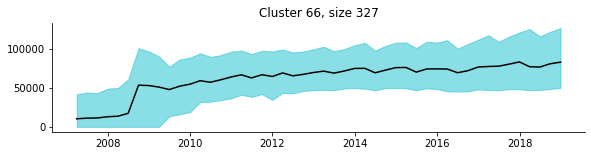

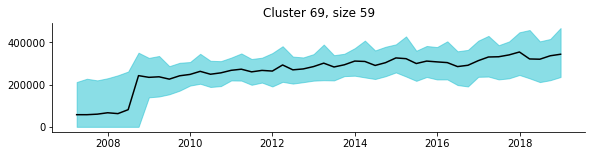

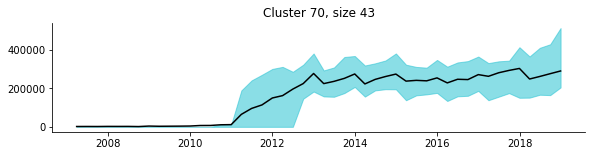

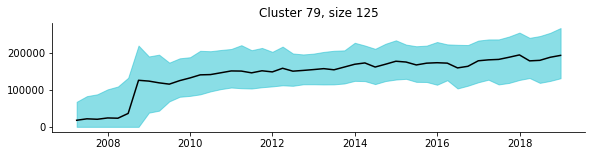

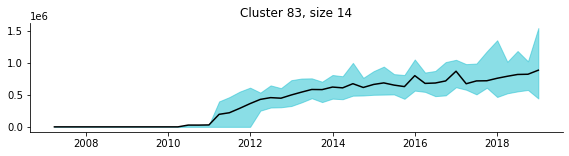

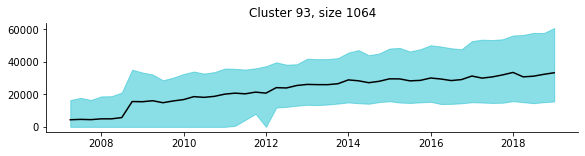

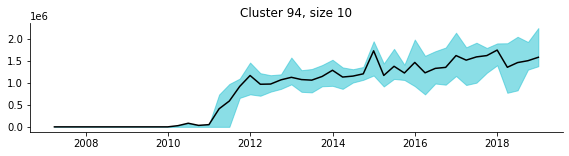

In [17]:
with plt.style.context(ts_style):
    #for c in set(d.values()):
        #c=0
    for c in ids:
        p = P[c]
        members = {f"prot_{c}":p}
        for ts in d.keys():
            if d[ts] == c:
                members[str(ts)] = X[ts]
        df = pd.DataFrame(members)
        if scale_plot:
            df[df.columns] = StandardScaler().fit_transform(df[df.columns])
        df.index = date_range
        #df = df[plot_index : plot_index + length]
        plt.figure(figsize=(size, height))
        if not fill_area:
            rgba_colors = np.zeros((len(df), 4))
            rgba_colors[0,3] = 1
            rgba_colors[1:,3] = 0.1
            df.plot(
                legend=False,
                color=rgba_colors,
                title=f"Cluster {c}, size {len(df.columns)-1}",
                ylim=(-2,4.5)
            )
            #plt.tight_layout()
            
            #plt.savefig(f"cluster_all_{c}.pdf", bbox_inches="tight")
            plt.show()
        else:
            std = df.std(axis=1)
            plt.plot(df.index, df[f"prot_{c}"], c="black")
            plt.fill_between(df.index, df.quantile(0.1, axis=1, interpolation="nearest").values, df.quantile(0.9, axis=1, interpolation="nearest").values, color=cmap(c), alpha=0.5)
            plt.title(f"Cluster {c}, size {len(df.columns)-1}")
            #plt.ylim((-2, 3))
            #plt.tight_layout()
            #plt.savefig(f"Figures/proposed_cluster_{c}.pdf", bbox_inches="tight")
            plt.show()

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0)

In [29]:
X = df.values.T

In [30]:
pca = PCA(n_components=10)
pca.fit(X)
pca.explained_variance_ratio_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

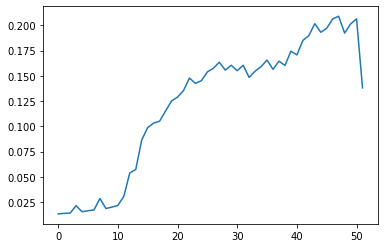

In [27]:
import matplotlib.pyplot as plt
plt.plot(pca.components_[0])

## Larned embedding colored by scale

In [1]:
from revenue.model import TCN
import numpy as np
import pandas as pd
import pickle
import torch
import matplotlib.pyplot as plt

In [2]:
MODEL_PATH = "Z:\TCN_clone\TCN\\revenue\models\\56cb90e4c3c24f1da293cf86833d0fbc.pt"
args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))

In [3]:
model = TCN(
    num_layers=args.num_layers,
    in_channels=1,
    out_channels=1,
    residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
    kernel_size=args.kernel_size,
    bias=args.bias,
    dropout=args.dropout,
    stride=1,
    leveledinit=args.leveledinit,
    embedding_dim=args.embedding_dim,
    embed=args.embed,
    num_embeddings=15229,
)
model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
model.eval()

None


TCN(
  (tcn): TemporalConvolutionalNetwork(
    (net): Sequential(
      (0): ResidualBlock(
        (dcc1): DilatedCausalConv(1, 16, kernel_size=(4,), stride=(1,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,))
        (drop2): Dropout(p=0.2, inplace=False)
        (res_conv): Conv1d(1, 16, kernel_size=(1,), stride=(1,))
      )
      (1): ResidualBlock(
        (dcc1): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop2): Dropout(p=0.2, inplace=False)
      )
      (2): ResidualBlock(
        (dcc1): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop2): Dropout(p=0.2, inplace=Fa

In [24]:
ids = [i for i in range(15229)]
embds = model.embedding(torch.LongTensor(ids)).detach().cpu().numpy()

In [44]:
from matplotlib import rc
rc("text", usetex=True)
ts_style = {
    "axes.spines.left": True,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": True,
    "ytick.left": True,
}
cluster_style = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": False,
    "ytick.left": False,
}
size = 4.77/2

In [45]:
#from sklearn.preprocessing import StandardScaler
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0)

X = df.values.T
means = np.nanmean(X, axis=1)
#means = (means - np.mean(means)) / np.var(means)
print(np.std(means))
means = means / np.std(means)
#means = StandardScaler().fit_transform(means)
means.shape, means[:5]
#means = np.mean(X, axis=1)

809023.3306324881


((15229,),
 array([2.95108918e-03, 9.88846637e-06, 2.39643955e-06, 9.32783332e-03,
        4.94851185e-04]))

(array([2.000e+00, 0.000e+00, 0.000e+00, 9.679e+03, 1.267e+03, 6.470e+02,
        4.490e+02, 2.840e+02, 2.320e+02, 2.070e+02]),
 array([-4470.61538462, -3023.56471572, -1576.51404682,  -129.46337793,
         1317.58729097,  2764.63795987,  4211.68862876,  5658.73929766,
         7105.78996656,  8552.84063545,  9999.89130435]),
 <a list of 10 Patch objects>)

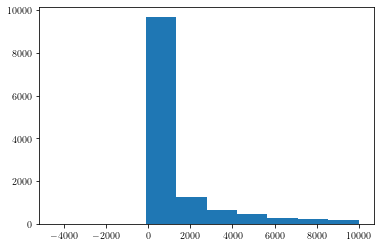

In [48]:
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0)

X = df.values.T
means_plot = np.nanmean(X, axis=1)
plt.hist(means_plot[np.where(means_plot < 1e4)])

(13965, 2)


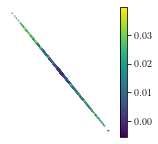

In [49]:
ceil = 0.04
embds_small = embds[np.where(means < ceil)]
print(embds_small.shape)
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(embds_small[:,0], embds_small[:,1], s=2, linewidth=0.1, c=means[np.where(means < ceil)])#, norm
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.savefig("Figures/test_scale.pdf", bbox_inches="tight")

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0).fillna(0)
df_comp = pd.read_csv("revenue/data/comp_sect_meta.csv", index_col=0)
X = df.values.T
comp_sect_dict = {d["company"] : d["sector"] for d in df_comp.to_dict("records")}

In [11]:
df_comp.head()

company             sector
0               R.R. Donnelley & Sons Co.  business_services
1                       Digitree Group SA  business_services
2  Advantex Marketing International, Inc.  business_services
3                             Faith, Inc.  business_services
4                             Aimia, Inc.  business_services

In [17]:
set(comp_sect_dict.values())


{'business_services',
 'consumer_cyclicals',
 'consumer_non-cyclicals',
 'consumer_services',
 'energy',
 'finance',
 'healthcare',
 'industrials',
 'non-energy_materials',
 'other',
 'technology',
 'telecommunications',
 'utilities'}

In [44]:
prototypes = []
cluster_dict = {}
for i, sector in enumerate(set(comp_sect_dict.values())):
    members = [k for k in comp_sect_dict.keys() if comp_sect_dict[k] == sector]
    members_ts = df[members].values.T
    p = np.mean(members_ts, axis=0)
    prototypes.append(p)
    for m in members:
        index = df.T.index.get_loc(m)
        #print(index)
        cluster_dict[index] = i
    print(p.shape)

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)


In [45]:
prototypes = np.array(prototypes)[:48]
prototypes.shape

(13, 52)

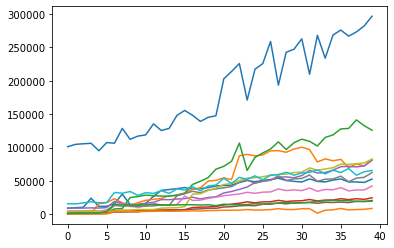

In [47]:
import matplotlib.pyplot as plt
plt.plot(prototypes.T[:40])

## Forecast prototypes

In [50]:
from revenue.data import RevenueDataset
from revenue.model import TCN
import pickle
import torch

In [53]:
model_path = "Z:\TCN_clone\TCN\\revenue\models\\9dd49918c3834dfd9916abd926f80e41.pt"
args = pickle.load(open(f"{model_path}__args.pkl", "rb"))

In [55]:
model = TCN(
    num_layers=model_args.num_layers,
    in_channels=1,
    out_channels=1,
    residual_blocks_channel_size=[model_args.res_block_size]
    * model_args.num_layers,
    kernel_size=model_args.kernel_size,
    bias=model_args.bias,
    dropout=model_args.dropout,
    stride=1,
    leveledinit=model_args.leveledinit,
    embedding_dim=model_args.embedding_dim,
    embed=model_args.embed,
)
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

None


TCN(
  (tcn): TemporalConvolutionalNetwork(
    (net): Sequential(
      (0): ResidualBlock(
        (dcc1): DilatedCausalConv(1, 32, kernel_size=(4,), stride=(1,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(4,), stride=(1,))
        (drop2): Dropout(p=0.2, inplace=False)
        (res_conv): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
      )
      (1): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop2): Dropout(p=0.2, inplace=False)
      )
      (2): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop2): Dropout(p=0.2, inplace=Fa

In [65]:
full_pred_prototypes = []
for p in range(prototypes.shape[0]):
    full_prototype = torch.from_numpy(prototypes[p, :48]).view(1, 1, -1).to(dtype=torch.float32)
    print(full_prototype.shape)
    with torch.no_grad():
        pred_prototype, _ = model.rolling_prediction(
            full_prototype, emb_id=0, tau=4, num_windows=2
        )
    print(pred_prototype.shape)
    prot = torch.from_numpy(prototypes[p,:40]).view(1,-1).to(dtype=torch.float32)
    print(prot.shape)
    full_pred_prototypes.append(torch.cat((prot, pred_prototype), 1))

full_pred_prototypes = torch.cat(full_pred_prototypes, 0)


torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])
torch.Size([1, 1, 48])
torch.Size([1, 8])
torch.Size([1, 40])


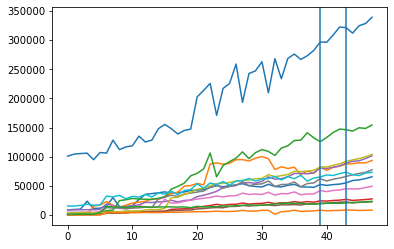

In [72]:
plt.plot(full_pred_prototypes.detach().numpy().T)
plt.axvline(39)
plt.axvline(43)

In [73]:
prots_path = "Z:\TCN_clone\TCN\\prototypes\\prototypes_matrices\sector_prots.npy"
dict_path = "Z:\TCN_clone\TCN\\prototypes\\cluster_dicts\sector_prots.pkl"

In [74]:
""" Save """
prots_np = full_pred_prototypes.detach().cpu().numpy()
np.save(prots_path, prots_np)

with open(dict_path, "wb") as handle:
    pickle.dump(cluster_dict, handle)

# Best clustering revenue vis

In [3]:
import pandas as pd
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=True)

cluster_style = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": False,
    "ytick.left": False,
}
size = 4.77/2

In [6]:
sarima_rep = pd.read_csv("Z:\TCN_clone\TCN\\representations\\representation_matrices\\revenue_sarima.csv")
cluster_dict = pickle.load(open("Z:\TCN_clone\TCN\\prototypes\cluster_dicts\\revenue_sarima_unscaled_nc_30_euclidean_Spectral_clustering_nc_100.pkl", "rb"))

In [8]:
X_tsne = TSNE(n_components=2, verbose=1).fit_transform(sarima_rep.fillna(0).values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15229 samples in 0.060s...
[t-SNE] Computed neighbors for 15229 samples in 0.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15229
[t-SNE] Computed conditional probabilities for sample 2000 / 15229
[t-SNE] Computed conditional probabilities for sample 3000 / 15229
[t-SNE] Computed conditional probabilities for sample 4000 / 15229
[t-SNE] Computed conditional probabilities for sample 5000 / 15229
[t-SNE] Computed conditional probabilities for sample 6000 / 15229
[t-SNE] Computed conditional probabilities for sample 7000 / 15229
[t-SNE] Computed conditional probabilities for sample 8000 / 15229
[t-SNE] Computed conditional probabilities for sample 9000 / 15229
[t-SNE] Computed conditional probabilities for sample 10000 / 15229
[t-SNE] Computed conditional probabilities for sample 11000 / 15229
[t-SNE] Computed conditional probabilities for sample 12000 / 15229
[t-SNE] Computed conditional probabilities for sam

In [28]:
labels = list(cluster_dict.values())
#from matplotlib import cm
#cmap=cm.get_cmap("tab20")
#cmap(1.1)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)

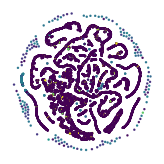

In [31]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:, 0], X_tsne[:,1], c=labels, s=5, linewidth=0.1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig("Figures/revenue_sarima_cluster.pdf", bbox_inches="tight")